# Importing Data and tools needed for for my project

In [2]:
#Data Reading 
import yfinance as yf # source where i get the stock info from
import pandas as pd
import numpy as np
import itertools

#Plotting tools
import matplotlib.pyplot as plt


#Modeling
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX



#metrics and building my function
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Data 
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "ADBE AMD ALXN ALGN GOOG GOOGL AMZN AAL AMGN ADI ANSS AMAT ASML ADSK ADP BIDU BIIB BMRN AVGO CDNS CDW CERN CHTR CHKP CTAS CSCO CTXS CTSH CMCSA CRPT CSGP COST CSX DLTR EBAY EA EXC FB FAST FISV FOX FOXA GILD IDXX ILMN INCY INTC INTU ISRG JD KLAC LRCX LBTYA LBTYK LULU MAR MELI MCHP MU MSFT MDLZ MNDZ NTAP NTES NVDA NXPI ORLY PCAR PAYX PYPL PEP QCOM REGN ROST SGEN SIRI SWKS SPLK SBUX SNPS TMUS TTWO TSLA TXN KHC TCOM ULTA UAL VRSN VRSK VRTX WBA WDC WLTW WDAY XEL XLNX AAPL MSFT ATVI ",
        
        start="2015-01-01",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  99 of 99 completed

1 Failed download:
- MNDZ: No data found, symbol may be delisted


In [4]:
data

MNDZ                                       NTAP             \
           Open High Low Close Adj Close Volume       Open       High   
Date                                                                    
2015-01-02  NaN  NaN NaN   NaN       NaN    NaN  36.510648  36.607006   
2015-01-05  NaN  NaN NaN   NaN       NaN    NaN  36.090182  36.239097   
2015-01-06  NaN  NaN NaN   NaN       NaN    NaN  35.082815  35.328091   
2015-01-07  NaN  NaN NaN   NaN       NaN    NaN  34.991773  35.070940   
2015-01-08  NaN  NaN NaN   NaN       NaN    NaN  35.114913  35.968158   
...         ...  ...  ..   ...       ...    ...        ...        ...   
2020-04-30  NaN  NaN NaN   NaN       NaN    NaN  44.340000  44.340000   
2020-05-01  NaN  NaN NaN   NaN       NaN    NaN  42.570000  43.160000   
2020-05-04  NaN  NaN NaN   NaN       NaN    NaN  41.500000  41.700001   
2020-05-05  NaN  NaN NaN   NaN       NaN    NaN  41.160000  41.990002   
2020-05-06  NaN  NaN NaN   NaN       NaN    NaN  41.639999  42.465000   

                                  ...        WBA                        \
                  Low      Close  ...       Open       High        Low   
Date                              ...                                    
2015-01-02  35.932504  36.317932  ...  67.639247  68.599048  66.732765   
2015-01-05  34.960173  35.082809  ...  66.723870  67.452606  66.004015   
2015-01-06  34.618549  34.767464  ...  67.514813  67.541473  65.710746   
2015-01-07  34.683903  34.947792  ...  66.697220  68.154694  66.617233   
2015-01-08  35.079731  35.669083  ...  68.696808  69.265577  68.305776   
...               ...        ...  ...        ...        ...        ...   
2020-04-30  43.410000  43.770000  ...  45.090000  45.209999  43.220001   
2020-05-01  41.080002  41.480000  ...  42.770000  43.099998  41.400002   
2020-05-04  40.009998  40.650002  ...  41.700001  42.820000  41.220001   
2020-05-05  41.040001  41.200001  ...  43.500000  43.529999  41.860001   
2020-05-06  41.165001  42.360001  ...  42.299999  42.299801  41.224998   

                                        FOX                                   \
                Close     Volume       Open       High        Low      Close   
Date                                                                           
2015-01-02  67.541489  3938500.0        NaN        NaN        NaN        NaN   
2015-01-05  66.208420  4767900.0        NaN        NaN        NaN        NaN   
2015-01-06  66.377274  4881600.0        NaN        NaN        NaN        NaN   
2015-01-07  68.074707  5672100.0        NaN        NaN        NaN        NaN   
2015-01-08  68.918983  4083900.0        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2020-04-30  43.290001  7887500.0  27.400000  27.400000  25.174999  25.559999   
2020-05-01  41.660000  7066200.0  25.000000  25.379999  24.670000  25.020000   
2020-05-04  42.450001  7189100.0  24.850000  24.959999  24.209999  24.629999   
2020-05-05  42.020000  7716100.0  24.820000  25.010000  23.629999  23.850000   
2020-05-06  41.470001  2603070.0  23.889999  24.620001  23.400000  24.559999   

                       
               Volume  
Date                   
2015-01-02        NaN  
2015-01-05        NaN  
2015-01-06        NaN  
2015-01-07        NaN  
2015-01-08        NaN  
...               ...  
2020-04-30  1787900.0  
2020-05-01   803100.0  
2020-05-04  1180100.0  
2020-05-05  1413200.0  
2020-05-06   897479.0  

[1346 rows x 496 columns]

# Data Cleaning
For data cleaning i want to make sure my data fits my needs. After looking at my data i have a great undewrstadning of what i need to do for the data claning process

## What do i need to do
    1. drop columns
           a.since i am trying to just predict prices i am just going to focus on the closing price. This means i can drop every other column
    
    2. drop pontential stocks
            a. I might need to drop stocks if the data did not download properly from them
    
    3. Fix up the shape of my dataset since it comes in an awkward multi index 
    
    4.Drop NA values
    
    5.Normalize my data so i can compare stocks with each other
        a. I decided to normalize my data by getting the Daily percent change of each stock
        
    
    
           


In [5]:
#1
data=data.drop(columns=['Open','High','Low', 'Volume','Adj Close'], axis=1, level=1)

In [6]:
#2
data.isna().sum()>1

MNDZ  Close     True
NTAP  Close    False
AVGO  Close    False
ULTA  Close    False
CTXS  Close    False
               ...  
CSX   Close    False
AMD   Close    False
JD    Close    False
WBA   Close    False
FOX   Close     True
Length: 99, dtype: bool

In [7]:
data=data.drop(columns=['MNDZ','CRPT','KHC','PYPL','FOXA','FOX'])

In [8]:
#3
data.columns=data.columns.droplevel(level=1)

In [9]:
#4
data.dropna(inplace=True)

In [10]:
#5
data_daily_change=data.pct_change()
data_daily_change.dropna(inplace=True)

In [11]:
#My new normalized dataset
data_daily_change

,NTAP,AVGO,ULTA,CTXS,CSCO,CDW,AMZN,EBAY,SGEN,AMAT,...,COST,TSLA,CHTR,ATVI,NTES,INTC,CSX,AMD,JD,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.034009,-0.015986,0.002444,-0.022212,-0.019920,-0.010614,-0.020517,-0.008361,0.015673,-0.032051,...,-0.011369,-0.042041,-0.035631,-0.013910,0.005971,-0.011276,-0.027057,-0.003745,0.023314,-0.019737
2015-01-06,-0.008989,-0.022743,-0.001573,-0.028033,-0.000370,-0.014497,-0.022833,-0.012917,-0.048411,-0.037665,...,0.013214,0.005664,-0.026106,-0.018640,0.017102,-0.018637,-0.039851,-0.011278,-0.002034,0.002550
2015-01-07,0.005187,0.027013,0.028594,0.014918,0.009242,0.020889,0.010600,-0.001636,0.022258,0.009462,...,0.017413,-0.001562,0.003071,-0.021561,0.015035,0.020975,0.013138,-0.019011,0.011415,0.025573
2015-01-08,0.020639,0.049975,0.012713,0.004573,0.007692,0.025072,0.006836,0.026944,-0.012753,0.031956,...,0.008592,-0.001564,0.039225,0.009969,0.004970,0.018601,0.015915,0.011628,0.010883,0.012402
2015-01-09,0.002466,0.010694,-0.005067,-0.006503,0.010178,0.003936,-0.011749,-0.013827,-0.037492,0.000826,...,-0.015388,-0.018802,-0.005892,-0.018182,0.004363,0.001908,-0.002031,0.007663,-0.005582,-0.024243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,-0.024733,-0.015941,-0.036434,0.035934,-0.022150,-0.004403,0.042690,0.020497,-0.006156,-0.085756,...,-0.011064,-0.023273,0.001132,-0.016361,-0.023827,-0.029450,-0.028173,-0.023668,-0.027966,-0.045635
2020-05-01,-0.052319,-0.043885,-0.016703,-0.016757,-0.034450,-0.035921,-0.075974,-0.014562,0.061284,-0.056159,...,-0.003564,-0.103034,0.029098,0.015534,-0.056876,-0.041847,-0.018572,-0.047910,-0.039907,-0.037653
2020-05-04,-0.020010,0.009858,0.005600,0.026231,0.010508,0.012825,0.013101,0.014777,0.069486,0.014715,...,0.008512,0.085368,0.011950,0.030593,0.013032,0.009048,-0.019385,0.053729,0.021025,0.018963


# Exploratory Data Analysis(EDA)
EDA is what you do when you want to explore your dataset. Your really want to get know everything about your dataset. 
EDA also allows you to get a good understanding of how you want to set up the research

For my EDA i decided to use Volatility and also Correlation i will go more indepth later why i chose them

# Volatility
Volatility is the financial term for standerd deviation. It basically shows how the price of a certain stock behaves.
For someone who loves risk they would stick to a high volitile stock. This means the stock price moves wildly.
For someone who likes stability they would use go for stocks that have low volatility
## What i did for my project
For my project i decided split my stocks by volatility.For each stock, i calculated the standard deviation for the entire datset. Then i ordered the stocks by stadndard deviation. I used that list to split up my stocks as below.
1. Low
    a. The bottem 50 stocks with STD
2. Medium
    b. Stocks with the 51st to 26th highest STD
3. High
    c. Top 25 stocks with the highest STD
  




In [12]:
volatility=pd.DataFrame(data_daily_change.std())

In [13]:
volatility.describe()

,0
count,93.000000
mean,0.020854
std,0.004934
min,0.012748
25%,0.016954
50%,0.019815
75%,0.024262
max,0.040911


In [14]:
#Split my stocks up
mid_vol= volatility[(volatility[0] > .0194) & (volatility[0] < .0241) ]
low_vol=volatility[volatility[0]<.0194]
high_vol=volatility[volatility[0]>.02]

In [15]:
#
low_vol_data=data_daily_change[list(low_vol.index)]

mid_vol_data=data_daily_change[list(mid_vol.index)]

high_vol_data=data_daily_change[list(mid_vol.index)]

# EDA for each group
Now that i have my sections i decided that i want to learn more about each volatility group.
Each group is going to have diffrent intresting features about them. I am going to start with my low volatile group first

## General functions for my eda



In [16]:
 # plots daily returns of all my stocks within my groups
def plot_vol(title,data):
    plt.figure(figsize=(12,8))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title,fontsize=15)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Daily Percent Change',fontsize=15)
    plt.plot(data);

# Low Volatility EDA

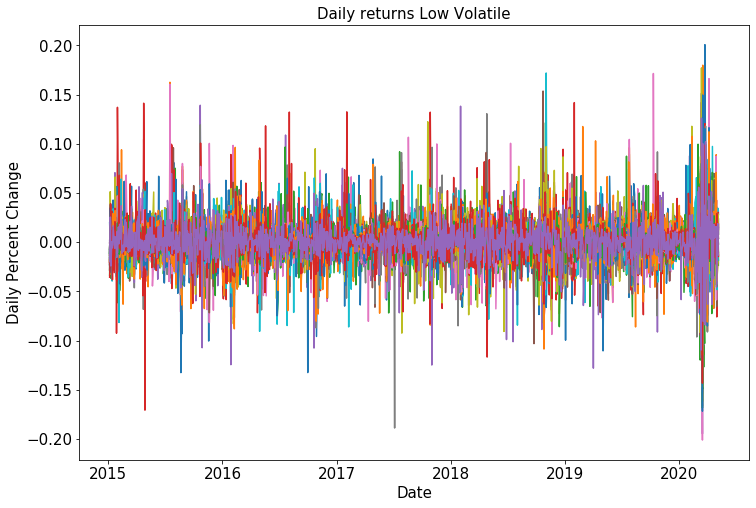

In [17]:
plot_vol('Daily returns Low Volatile',low_vol_data)

In [18]:
# These are the returns of all the stocks in my group 
# one thing that stands out is all those spikes which i am sure they relate to company news and earnings

# Medium Volatility EDA

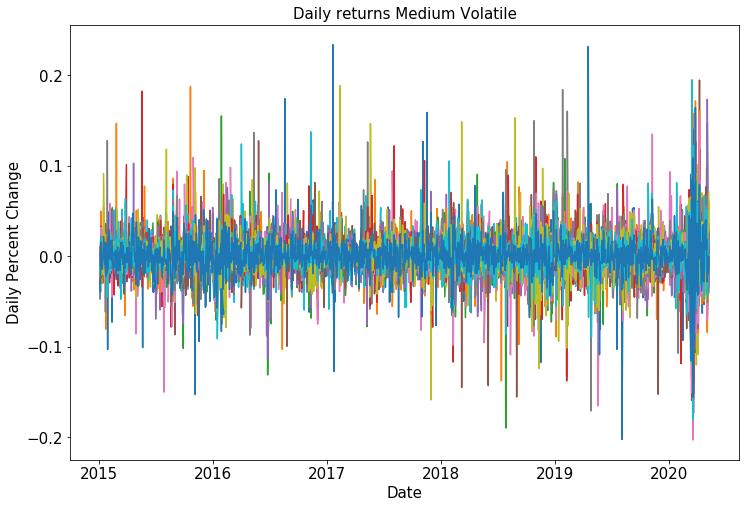

In [19]:
plot_vol('Daily returns Medium Volatile',mid_vol_data)

# High Volatitlity EDA

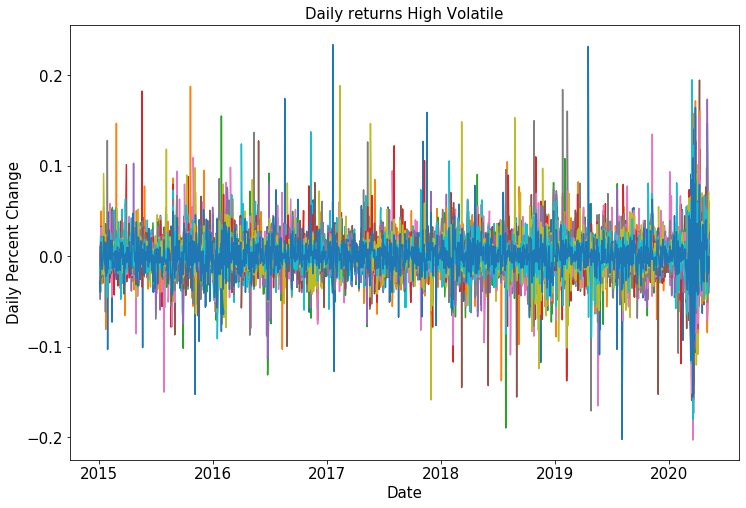

In [20]:
plot_vol('Daily returns High Volatile',high_vol_data)

# Correlation Analysis

Correlations between stock prices appear frequently throughout the stock market. One general rule in investing
is that we want to diversify our portfolio. In other words we want to buy stocks that dont have high correlation with each other. What i decided to do is go in each volatility bucket i have created and see if stocks correlate with each other. I am going to do this in a simple way. If a stock has a correlation of 50% or greater with other stocks, then i will create a group This also help me save time and computational power when fitting models. Instead of fitting models for each individual stock i will fit a generalized model for each group i make 

## Here are the steps i am going to take to achieve this
1. Use the correlation function to see what correlatess with what
2. From those results i am going to get stocks that have a 50% correlation or greater with each other
3. then i am going to see if specific stocks have a 50% correlation or greater with about half of the stocks in other groups
4. Lastly the stock with the greatest number of correlation is going to be the stock i am going to select to model the stocks it correlates with




# Correlations within low volatility group


In [34]:
# getting stocks that have a 50% correlation with each other
low_vol_data_corr=low_vol_data.corr()
low_vol_data_corr=low_vol_data_corr[low_vol_data_corr>.5]
low_vol_data_corr


,CTXS,CSCO,CDW,AMZN,EBAY,PEP,FAST,TXN,TMUS,VRSN,...,SIRI,GOOG,ADP,ADBE,MDLZ,CTSH,CSGP,COST,CHTR,WBA
CTXS,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.521238,NaN,NaN,NaN,NaN,NaN,NaN
CSCO,NaN,1.000000,0.566216,NaN,NaN,0.523711,0.514348,0.635247,NaN,0.561231,...,NaN,0.570217,0.624119,0.601019,0.500888,0.552476,NaN,NaN,NaN,NaN
CDW,NaN,0.566216,1.000000,NaN,NaN,NaN,NaN,0.549781,NaN,0.524676,...,0.513512,0.514149,0.589257,0.566044,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.652213,NaN,0.582124,NaN,NaN,NaN,NaN,NaN,NaN
EBAY,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEP,NaN,0.523711,NaN,NaN,NaN,1.000000,NaN,0.510544,NaN,0.502918,...,NaN,NaN,0.641746,NaN,0.679647,0.519734,NaN,0.550682,NaN,NaN
FAST,NaN,0.514348,NaN,NaN,NaN,NaN,1.000000,0.501707,NaN,NaN,...,NaN,NaN,0.513237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TXN,NaN,0.635247,0.549781,NaN,NaN,0.510544,0.501707,1.000000,NaN,0.552094,...,0.516257,0.568581,0.615314,0.611918,NaN,0.564546,NaN,NaN,NaN,NaN
TMUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,0.507967,NaN,NaN,NaN,NaN,NaN,NaN
VRSN,NaN,0.561231,0.524676,NaN,NaN,0.502918,NaN,0.552094,NaN,1.000000,...,NaN,0.565232,0.617594,0.600836,NaN,0.550004,0.519043,NaN,NaN,NaN


In [35]:
#Stocks that fit my criteria
Group1_low=low_vol_data_corr['GOOG'].dropna()
Group2_low=low_vol_data_corr['VRSK'].dropna()
Group3_low=low_vol_data_corr['PAYX'].dropna()
Group4_low=low_vol_data_corr['CDW'].dropna()
Group5_low=low_vol_data_corr['TXN'].dropna()
Group6_low=low_vol_data_corr['CSCO'].dropna()
Group7_low=low_vol_data_corr['SBUX'].dropna()
Group8_low=low_vol_data_corr['ADBE'].dropna()
Group9_low=low_vol_data_corr['MSFT'].dropna()
Group10_low=low_vol_data_corr['SNPS'].dropna()
Group11_low=low_vol_data_corr['AAPL'].dropna()
Group12_low=low_vol_data_corr['VRSN'].dropna()
Group13_low=low_vol_data_corr['ADP'].dropna()
Group14_low=low_vol_data_corr['CDNS'].dropna()
Group15_low=low_vol_data_corr['CTSH'].dropna()
Group16_low=low_vol_data_corr['ANSS'].dropna()
Group17_low=low_vol_data_corr['CTAS'].dropna()
print(len(low_vol_data_corr)/2,len(Group1_low),len(Group2_low),len(Group3_low),len(Group4_low),len(Group5_low),len(Group6_low),len(Group7_low),len(Group8_low),len(Group9_low),
      len(Group10_low),len(Group11_low),len(Group12_low),len(Group13_low),len(Group14_low),len(Group15_low),len(Group16_low),len(Group17_low))




22.5 22 24 35 21 25 27 22 27 36 29 21 24 36 22 21 32 26


In [36]:
low_vol_modeling=Group12_low

Since the stock PAYX coorelates with the most stocks that is the stock that i am going to model my low volatility group with. For the stocks that dont have a strong correlation with PAYX i am going to model them individually

# Correlations within mid volatility group


In [37]:
mid_vol_data_corr=mid_vol_data.corr()
mid_vol_data_corr=mid_vol_data_corr[mid_vol_data_corr>.5]
mid_vol_data_corr


,NTAP,AVGO,FB,ADI,ASML,MAR,BIDU,EA,ADSK,REGN,...,KLAC,LBTYA,TTWO,LBTYK,DLTR,MCHP,XLNX,ATVI,INTC,CSX
NTAP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVGO,NaN,1.000000,NaN,0.680631,0.630069,NaN,NaN,NaN,NaN,NaN,...,0.555718,NaN,NaN,NaN,NaN,0.651974,0.543390,NaN,0.564403,NaN
FB,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADI,NaN,0.680631,NaN,1.000000,0.666288,NaN,NaN,NaN,0.535741,NaN,...,0.685360,NaN,NaN,NaN,NaN,0.805071,0.680588,NaN,0.649104,0.539089
ASML,NaN,0.630069,NaN,0.666288,1.000000,0.520753,NaN,NaN,0.569024,NaN,...,0.681330,NaN,NaN,NaN,NaN,0.695501,0.581795,NaN,0.607948,NaN
MAR,NaN,NaN,NaN,NaN,0.520753,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.514452,NaN,NaN,NaN,NaN
BIDU,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,0.590598,NaN,NaN,NaN,NaN,0.613501,NaN,NaN
ADSK,NaN,NaN,NaN,0.535741,0.569024,NaN,NaN,NaN,1.000000,NaN,...,0.529611,NaN,NaN,NaN,NaN,0.553563,NaN,NaN,0.509255,NaN
REGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Group1_mid=mid_vol_data_corr['KLAC'].dropna()
Group2_mid=mid_vol_data_corr['QCOM'].dropna()
Group3_mid=mid_vol_data_corr['ADI'].dropna()
Group4_mid=mid_vol_data_corr['ASML'].dropna()
Group5_mid=mid_vol_data_corr['AVGO'].dropna()
Group6_mid=mid_vol_data_corr['MCHP'].dropna()
Group7_mid=mid_vol_data_corr['INTC'].dropna()

In [39]:
print(len(mid_vol_data_corr)/2,len(Group1_mid),len(Group2_mid),len(Group3_mid),len(Group4_mid),len(Group5_mid),len(Group6_mid),len(Group7_mid))

10.5 9 8 10 10 8 11 9


In [40]:
Medium_vol_modeling=Group3_mid

# Correlations within high volatility group

In [41]:
high_vol_data_corr=high_vol_data.corr()
high_vol_data_corr=high_vol_data_corr[high_vol_data_corr>.5]
high_vol_data_corr

,NTAP,AVGO,FB,ADI,ASML,MAR,BIDU,EA,ADSK,REGN,...,KLAC,LBTYA,TTWO,LBTYK,DLTR,MCHP,XLNX,ATVI,INTC,CSX
NTAP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVGO,NaN,1.000000,NaN,0.680631,0.630069,NaN,NaN,NaN,NaN,NaN,...,0.555718,NaN,NaN,NaN,NaN,0.651974,0.543390,NaN,0.564403,NaN
FB,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADI,NaN,0.680631,NaN,1.000000,0.666288,NaN,NaN,NaN,0.535741,NaN,...,0.685360,NaN,NaN,NaN,NaN,0.805071,0.680588,NaN,0.649104,0.539089
ASML,NaN,0.630069,NaN,0.666288,1.000000,0.520753,NaN,NaN,0.569024,NaN,...,0.681330,NaN,NaN,NaN,NaN,0.695501,0.581795,NaN,0.607948,NaN
MAR,NaN,NaN,NaN,NaN,0.520753,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.514452,NaN,NaN,NaN,NaN
BIDU,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,0.590598,NaN,NaN,NaN,NaN,0.613501,NaN,NaN
ADSK,NaN,NaN,NaN,0.535741,0.569024,NaN,NaN,NaN,1.000000,NaN,...,0.529611,NaN,NaN,NaN,NaN,0.553563,NaN,NaN,0.509255,NaN
REGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
Group1_high=high_vol_data_corr['MCHP'].dropna()
# compare length

In [43]:
high_vol_modeling=Group1_high

# What now ?
After i found significant correlations between stocks, i wanted to find the stock that had the most correlations that are %50 or greater with other stocks in the group For example in the low volatility group PAYX correlates with 36 other stocks. That stock correlates with the most stock in the group. Whatever i do with PAYX i am going to do with the other stocks within that group


## Modeling process steps
These steps will occur as follows For each volatitlity group:
1. Find the stock that has the most strong correlations with others in the group
2. Decompose it
3. Find baseline modeing
4. Use gridsearch to tune my model
5. Apply the parameters gridsearch has found to all the other stocks within that group
6. Whatever stock is left of i am going to repeat the process for each individual stock 
   


# Functions i will be using
The functions i have gotten are from specific websites. Within each cell the function is in i am going to link the website it came from. These functions are going to help me do both fit my baseline model and also grid search my model so i can give them the best params for it

In [44]:
#  this website https://www.liip.ch/en/blog/time-series-prediction-a-short-comparison-of-best-practices
# this function is used to make my baseline models
def sarimax(train,test):
    predictions = []
    error = []
    model = SARIMAX(train,order=(1,0,0))
    res=model.fit()
    history = [x for x in train] #seed history with training data
      # walk forward
    for i in range(len(test)):
        model = SARIMAX(test,order=(1,0,0))
        res=model.fit()
        # fit model and make forecast for history
        yhat = res.predict()
        predictions.append(yhat) #store the forecast
        history.append(test[i]) #add it to history for next loop
    return predictions[0][1:]

In [45]:
# https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
# this function is used to grid search my models
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0],model_fit
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(d, n_test):
	return d[:-n_test], d[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(d, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(d, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat,model = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error,model
 
# score a model, return None on failure
def score_model(d, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result,model = walk_forward_validation(d, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result,model = walk_forward_validation(d, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result,model)
 
# grid search configs
def grid_search(d, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(d, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(d, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models
def tune(symbol):
	# define dataset
    d = data[symbol].values
    print(d)
	# data split
    n_test = 1100
	# model configs
    cfg_list = sarima_configs()
	# grid search
    scores = grid_search(d, cfg_list, n_test)
    print('done')
	# list top 3 configs
    return scores[0]


In [46]:
#graphing function to help me plot my results
def graph(predictions,test,name):
    plt.figure(figsize=(12,8))
    plt.plot(predictions,label='Prediction')
    plt.plot(test,label='Actual')
    plt.legend(fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(name,fontsize=25)
    plt.xlabel('Date',fontsize=25)
    plt.ylabel('Price',fontsize=25)

# Low volatility modeling
For predicting my low volatility modeling i am going to model the stock PAYX. The reason why is because it has the most correlations of 50% with stocks in the group.
 

In [33]:
#This shows all of the stocks that Google has a strong correlation too
low_vol_modeling.index

Index(['CSCO', 'CDW', 'PEP', 'TXN', 'VRSN', 'MSFT', 'FISV', 'VRSK', 'SNPS',
       'WLTW', 'AAPL', 'ISRG', 'PAYX', 'CDNS', 'ANSS', 'SBUX', 'INTU', 'GOOGL',
       'CTAS', 'GOOG', 'ADP', 'ADBE', 'CTSH', 'CSGP'],
      dtype='object')

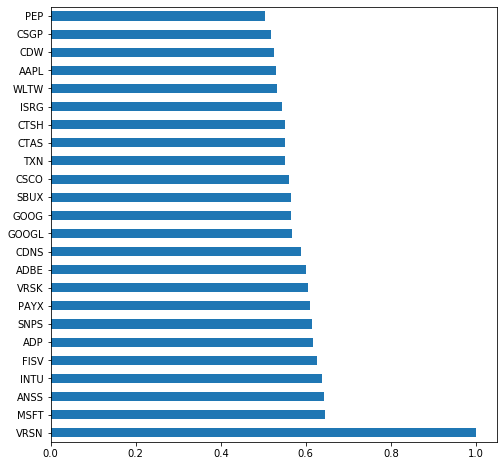

In [47]:
low_vol_modeling.sort_values(ascending=False).plot(kind='barh',figsize=(8,8))

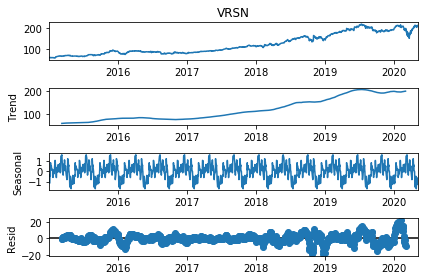

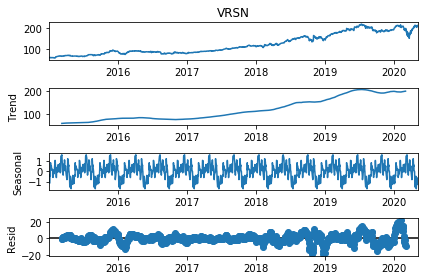

In [48]:
#Decomposed the trend to get a better understanding what is going on
decomp=sm.tsa.seasonal_decompose(data['VRSN'],model='additive',freq=90)
decomp.plot()

In [49]:
# modeling

In [94]:
#The first step in time series modeling is split up your data
#i used 1100 as the cut off because that is 80 percent of my data. So 80 percent is train and 20 percent test
X=data['VRSN']
train=X[:1100]
test=X[1100:]

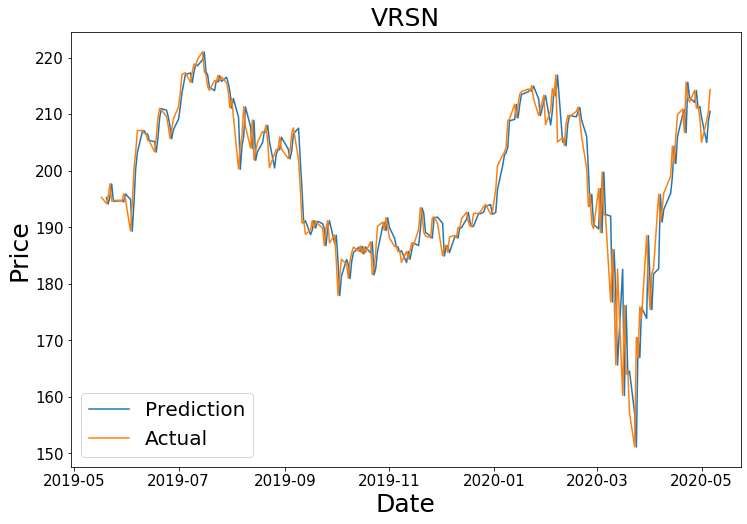

In [51]:
#use my sarimax function to make baseline predictions 
predictions=sarimax(train,test)
graph(predictions,test,'VRSN')

In [238]:
#get the rmse for our model
np.sqrt(mean_squared_error(test[1:],predictions))

4.4715737878016935

In [240]:
#Grid Searching 
tune('VRSN')

[ 57.18999863  56.24000168  55.18000031 ... 209.49000549 205.02000427
 207.44999695]
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 139.711
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 2.579
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 53.828
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'c']] 2.652
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 2.576
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 25.550
 > Model[[(0, 1, 0), (0, 0, 0, 0), 't']] 2.655
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 70.550
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 2.569
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'ct']] 2.579
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'ct']] 17.831
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'n']] 2.567
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 2.578
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 2.656
 > Model[[(1, 0, 1), (0, 0, 0, 0), 'n']] 2.578
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'c']] 2.566
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'ct']] 9.853
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'c']] 2.656
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 27.655
 > Model[[(

In [ ]:
# After i got my VRSN parameters i am going to now apply it to all my stocks that it correlates with

In [62]:
# Altering the function to fit VRSK parameters to all the other stocks it has a strong correlation with
#https://www.liip.ch/en/blog/time-series-prediction-a-short-comparison-of-best-practices
def sarimax_low(train,test):
    predictions = []
    error = []
    model = SARIMAX(train,order=(2,1,2),trend='c')
    res=model.fit()
    history = [x for x in train] #seed history with training data
      # walk forward
    for i in range(len(test)):
        model = SARIMAX(test,order=(2,1,2),trend='c')
        res=model.fit()
        # fit model and make forecast for history
        yhat = res.predict()
        predictions.append(yhat) #store the forecast
        history.append(test[i]) #add it to history for next loop
    return predictions[0][1:]

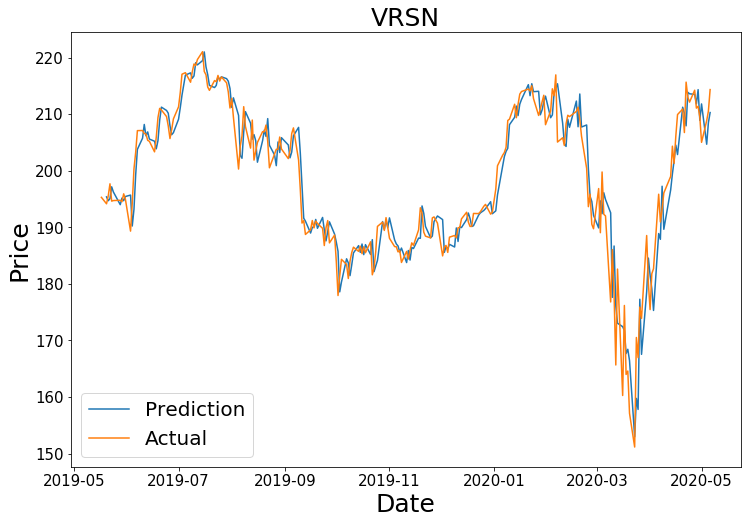

In [100]:
predictions=sarimax_low(train,test)
graph(predictions,test,'VRSN')

In [99]:
np.sqrt(mean_squared_error(test[1:],predictions))

3.76335473753178

## CSCO

In [63]:
X=data['CSCO']
train=X[:1100]
test=X[1100:]

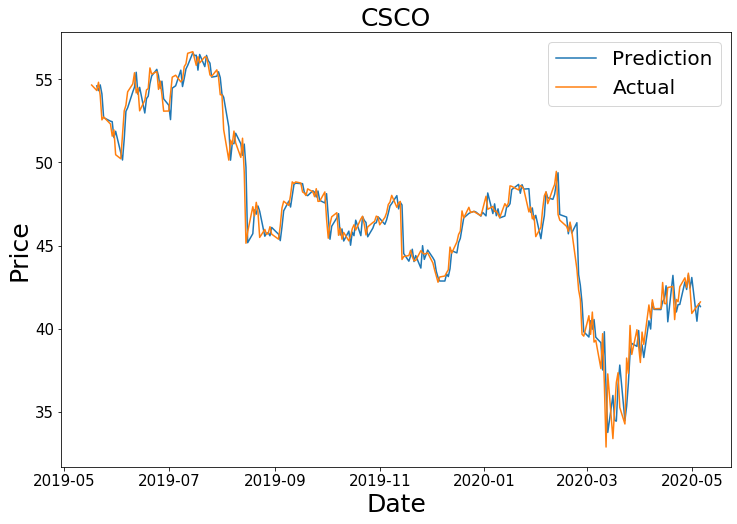

In [65]:
predictions=sarimax_low(train,test)
graph(predictions,test,'CSCO')

In [66]:
np.sqrt(mean_squared_error(test[1:],predictions))

0.9937021746758236

## CDW

In [67]:
X=data['CDW']
train=X[:1100]
test=X[1100:]

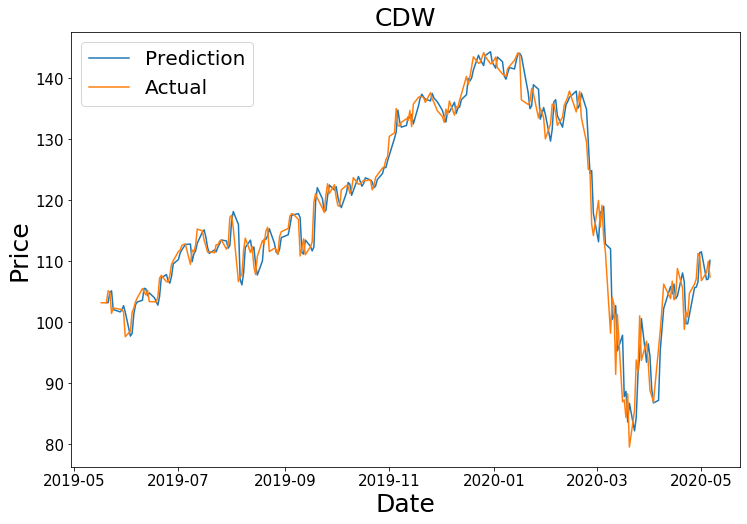

In [68]:
predictions=sarimax_low(train,test)
graph(predictions,test,'CDW')

In [69]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.948397212413977

## PEP

In [101]:
X=data['PEP']
train=X[:1100]
test=X[1100:]

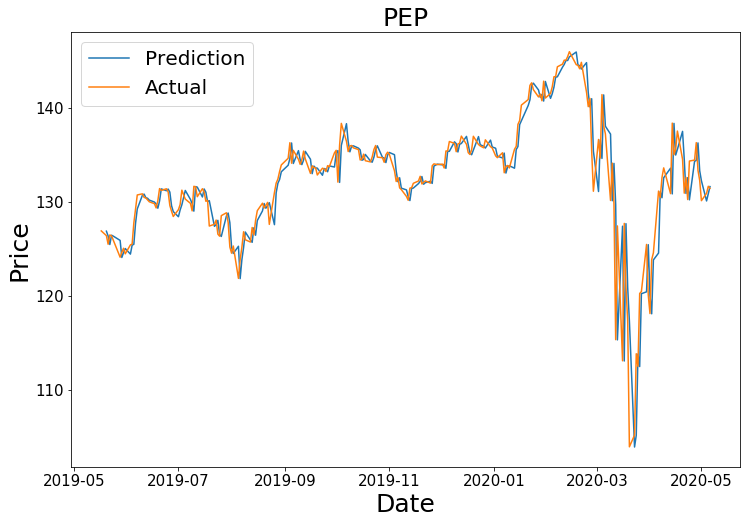

In [103]:
predictions=sarimax(train,test)
graph(predictions,test,'PEP')

In [104]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.800122888232951

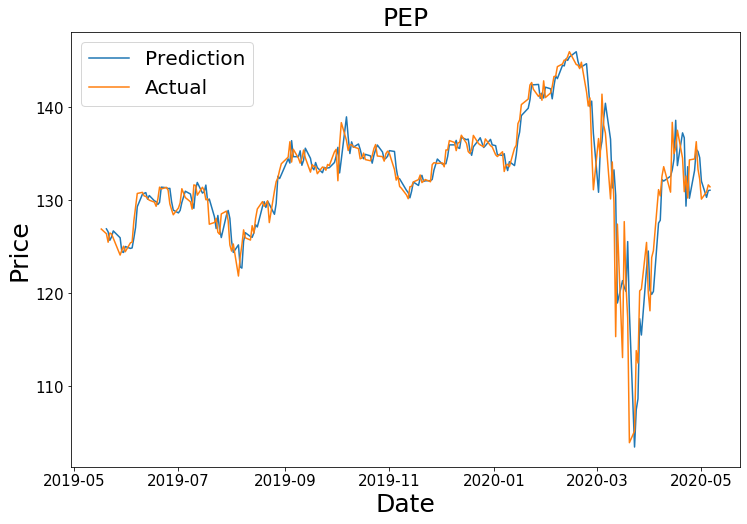

In [71]:
predictions=sarimax_low(train,test)
graph(predictions,test,'PEP')

In [72]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.464907333397574

## TXN

In [73]:
X=data['TXN']
train=X[:1100]
test=X[1100:]

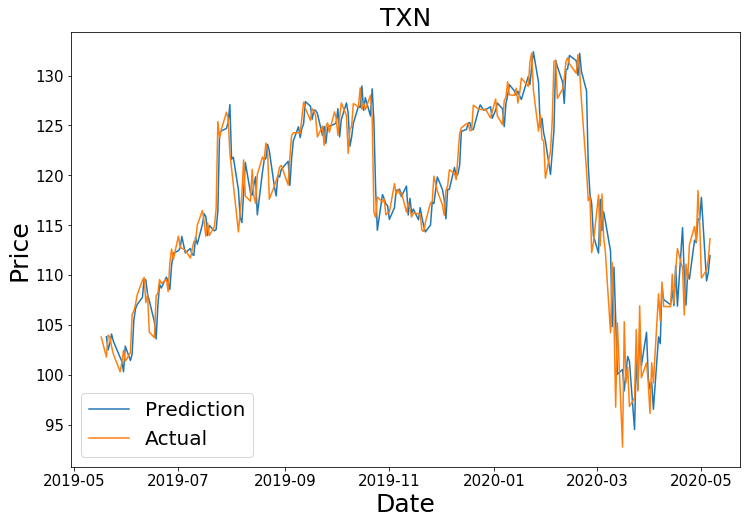

In [74]:
predictions=sarimax_low(train,test)
graph(predictions,test,'TXN')

In [75]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.5832740059868073

## MSFT

In [105]:
X=data['MSFT']
train=X[:1100]
test=X[1100:]

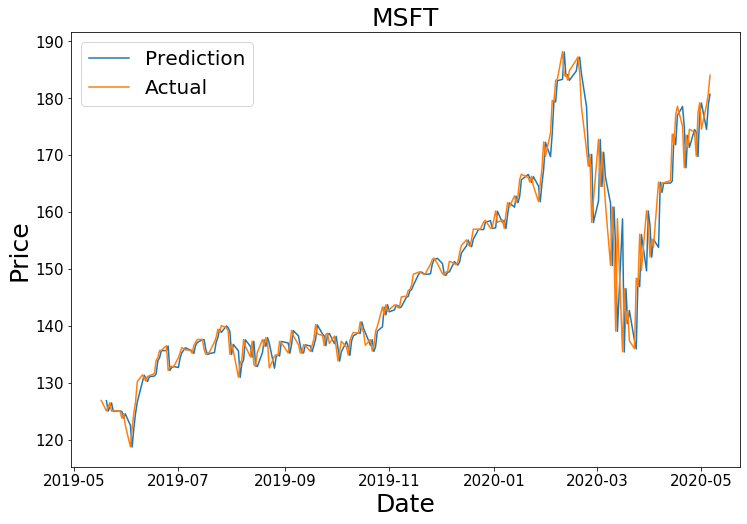

In [106]:
predictions=sarimax(train,test)
graph(predictions,test,'MSFT')

In [107]:
np.sqrt(mean_squared_error(test[1:],predictions))

3.892416077056356

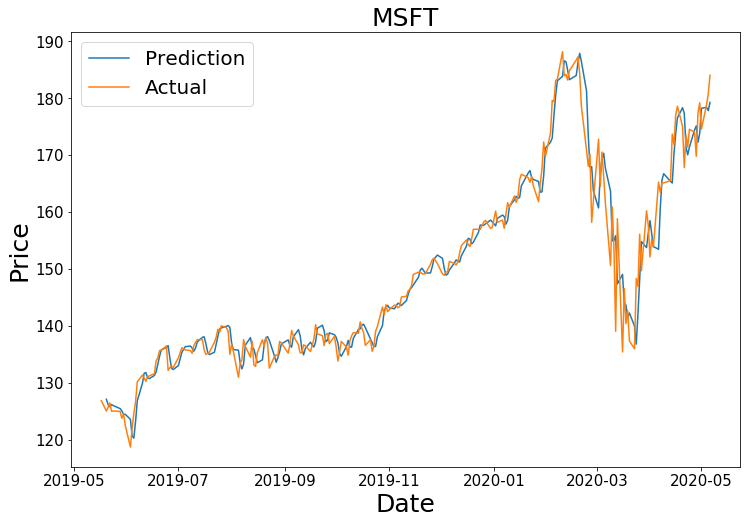

In [77]:
predictions=sarimax_low(train,test)
graph(predictions,test,'MSFT')

In [78]:
np.sqrt(mean_squared_error(test[1:],predictions))

3.4408469374400386

## FISV

In [79]:
X=data['FISV']
train=X[:1100]
test=X[1100:]

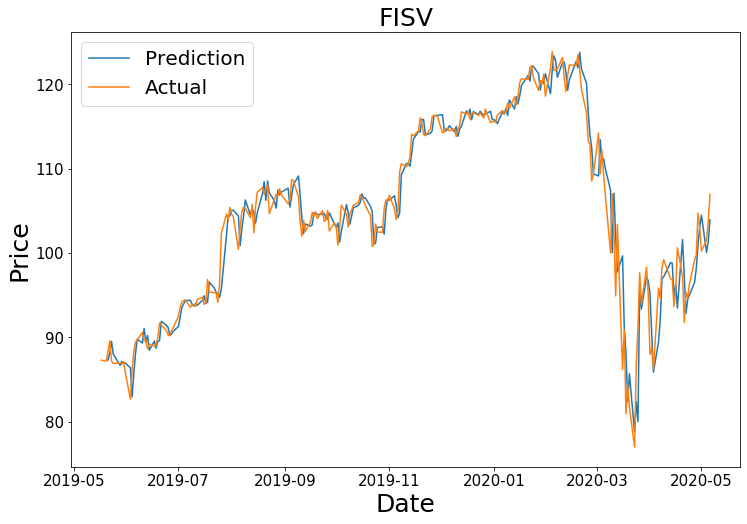

In [80]:
predictions=sarimax_low(train,test)
graph(predictions,test,'FISV')

In [81]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.4206799288951597

## SNPS

In [82]:
X=data['SNPS']
train=X[:1100]
test=X[1100:]

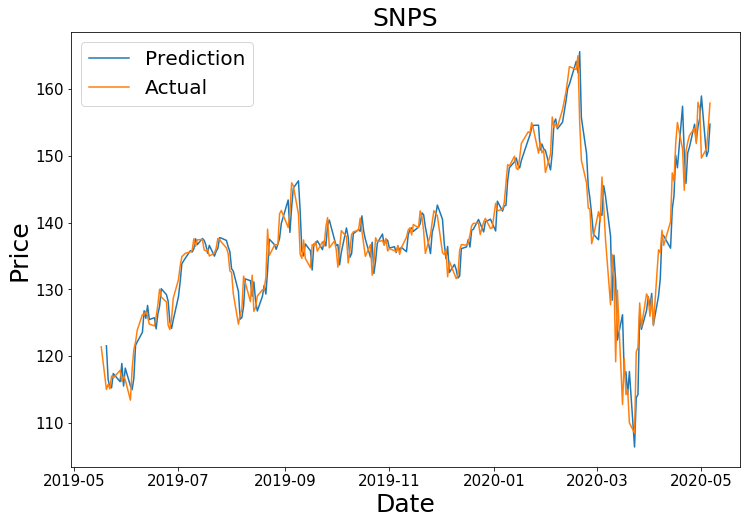

In [83]:
predictions=sarimax_low(train,test)
graph(predictions,test,'SNPS')

In [84]:
np.sqrt(mean_squared_error(test[1:],predictions))

3.112932797706994

## WLTW

In [ ]:
X=data['SNPS']
train=X[:1100]
test=X[1100:]

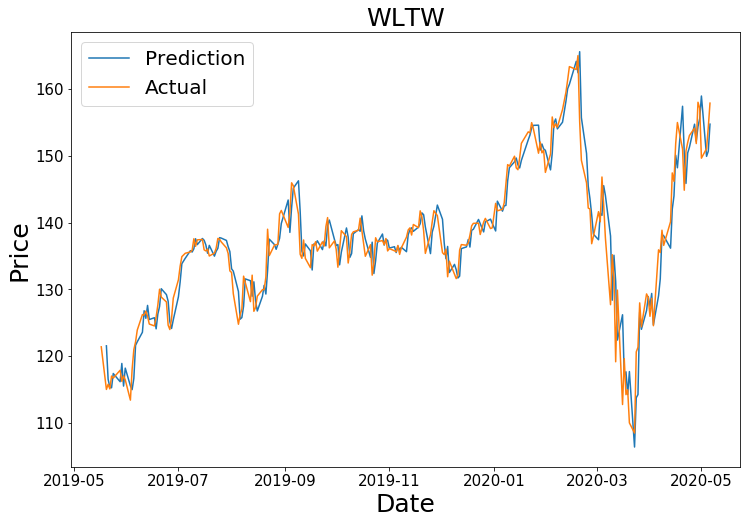

In [85]:
predictions=sarimax_low(train,test)
graph(predictions,test,'WLTW')

In [86]:
np.sqrt(mean_squared_error(test[1:],predictions))

3.112932797706994

## AAPL

In [88]:
X=data['AAPL']
train=X[:1100]
test=X[1100:]

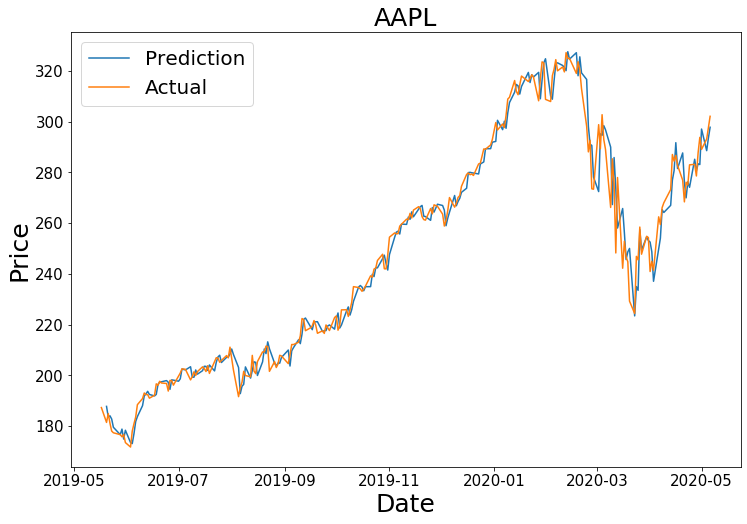

In [89]:
predictions=sarimax_low(train,test)
graph(predictions,test,'AAPL')

In [90]:
np.sqrt(mean_squared_error(test[1:],predictions))

5.990555481862055

## ISRG

In [91]:
X=data['ISRG']
train=X[:1100]
test=X[1100:]

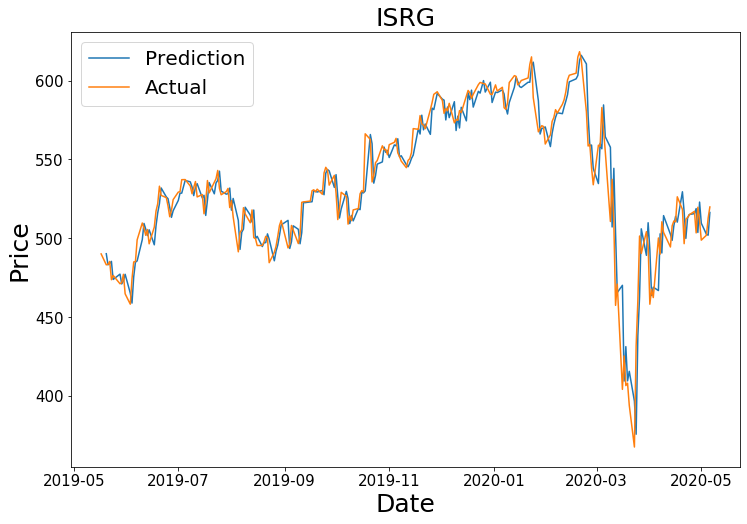

In [92]:
predictions=sarimax_low(train,test)
graph(predictions,test,'ISRG')

In [93]:
np.sqrt(mean_squared_error(test[1:],predictions))

12.825579196287881

In [ ]:
## PAYX

In [32]:
#Getting stocks that are not in the Correlation Group. These Stocks i will have to model individually
index_modeling=set(list(low_vol_modeling.index))
index_corr_data=set(list(low_vol_data_corr.index))
extra=list(set(index_corr_data) - set(index_modeling))
extra

['SIRI',
 'AMZN',
 'XEL',
 'CERN',
 'EXC',
 'MDLZ',
 'AMGN',
 'CTXS',
 'ROST',
 'GILD',
 'PCAR',
 'EBAY',
 'CMCSA',
 'IDXX',
 'CHTR',
 'ORLY',
 'CHKP',
 'COST',
 'FAST',
 'WBA',
 'TMUS']

# Stocks that did not have a strong correlation with VRSN
## ROST

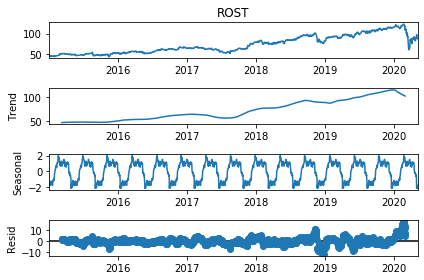

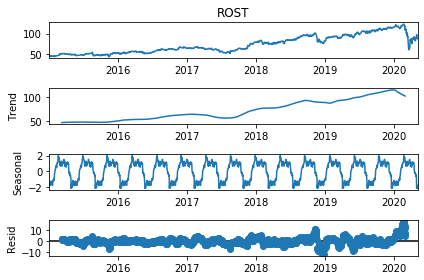

In [246]:
decomp=sm.tsa.seasonal_decompose(data['ROST'],model='additive',freq=90)
decomp.plot()

In [249]:
X=data['ROST']
train=X[:1100]
test=X[1100:]

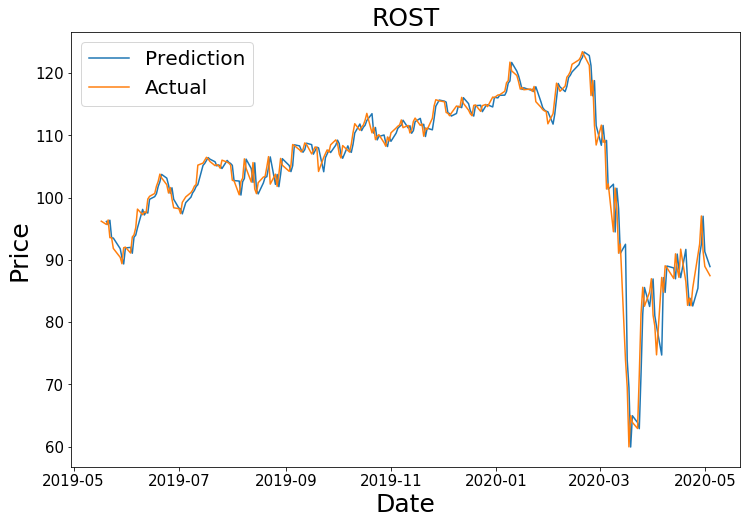

In [250]:
predictions=sarimax(train,test)
graph(predictions,test,'ROST')

In [251]:
tune('ROST')

[44.49742889 44.46420288 44.54964066 ... 91.36000061 88.95999908
 87.45999908]
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 80.502
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 23.713
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'n']] 1.593
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 1.598
 > Model[[(0, 1, 0), (0, 0, 0, 0), 't']] 1.595
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 20.033
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'c']] 1.594
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 40.787
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 1.596
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'ct']] 8.868
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 1.601
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 1.598
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'ct']] 1.596
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'n']] 23.071
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'n']] 1.594
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 1.595
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 12.379
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 1.597
 > Model[[(1, 0, 1), (0, 0, 0, 0), 'c']] 1.601
 > Model[[(1, 0, 0)

## CTXS

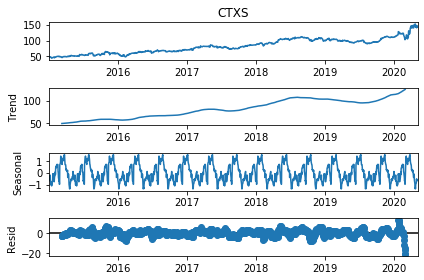

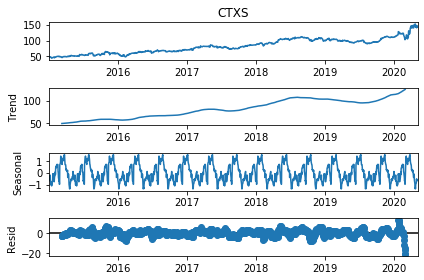

In [252]:
decomp=sm.tsa.seasonal_decompose(data['CTXS'],model='additive',freq=90)
decomp.plot()

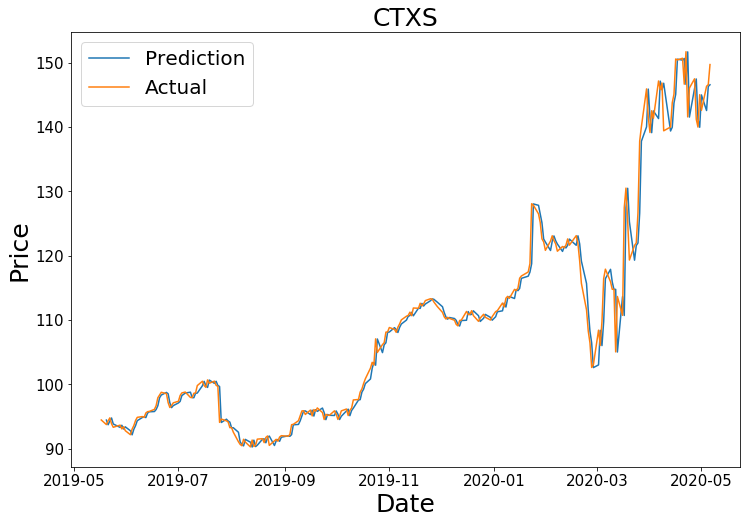

In [108]:
X=data['CTXS']
train=X[:1100]
test=X[1100:]
predictions=sarimax(train,test)
graph(predictions,test,'CTXS')

In [109]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.536713367939924

In [256]:
tune('CTXS')

[ 49.52841949  48.42830658  47.07072067 ... 145.00999451 142.58000183
 145.08000183]
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 90.988
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'n']] 1.512
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 1.513
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 24.672
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'c']] 1.511
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 1.511
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 24.392
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 1.513
 > Model[[(0, 1, 0), (0, 0, 0, 0), 't']] 1.513
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 12.830
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'ct']] 1.514
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'ct']] 8.232
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'n']] 1.518
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 1.513
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'ct']] 1.518
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 1.513
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'ct']] 1.518
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'n']] 25.572
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'n']] 1.512
 > Model[[(0

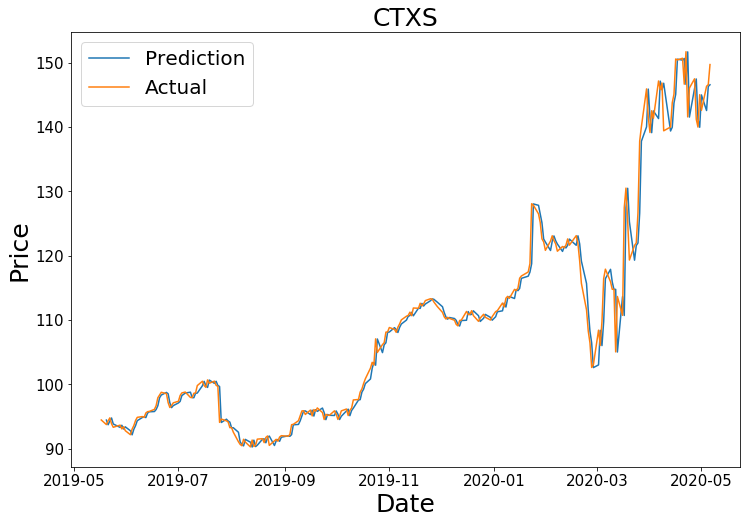

In [112]:
predicitons=sarimax_low(train,test)
graph(predictions,test,'CTXS')

In [113]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.536713367939924

In [116]:
def sarimax_CTXS(train,test):
    predictions = []
    error = []
    model = SARIMAX(train,order=(0,1,0),trend='c')
    res=model.fit()
    history = [x for x in train] #seed history with training data
      # walk forward
    for i in range(len(test)):
        model = SARIMAX(test,order=(0,1,0),trend='c')
        res=model.fit()
        # fit model and make forecast for history
        yhat = res.predict()
        predictions.append(yhat) #store the forecast
        history.append(test[i]) #add it to history for next loop
    return predictions[0][1:]

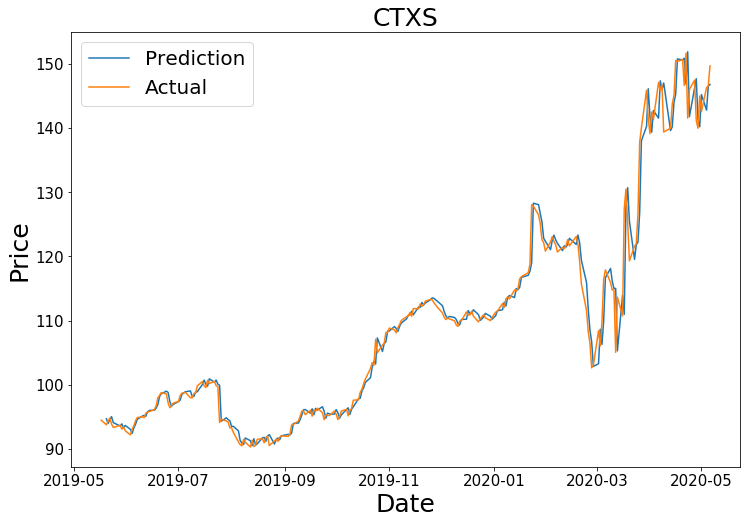

In [120]:
predictions=sarimax_CTXS(train,test)
graph(predictions,test,'CTXS')

In [121]:
np.sqrt(mean_squared_error(test[1:],predictions))

2.5244876752819776

## IDXX

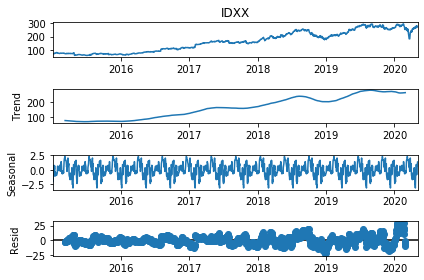

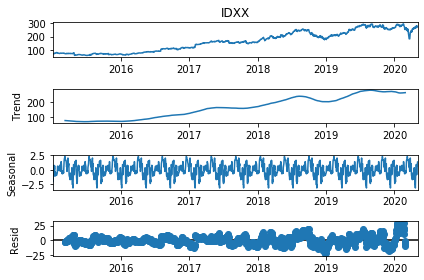

In [257]:
decomp=sm.tsa.seasonal_decompose(data['IDXX'],model='additive',freq=90)
decomp.plot()

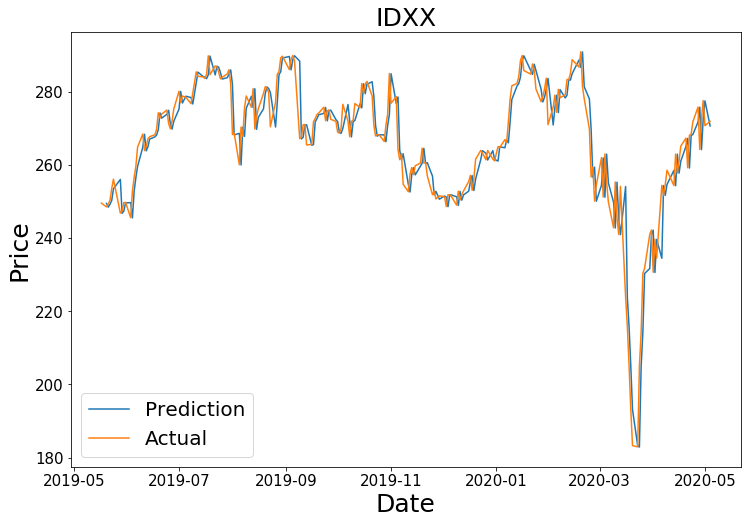

In [258]:
X=data['IDXX']
train=X[:1100]
test=X[1100:]
predictions=sarimax(train,test)
graph(predictions,test,'IDXX')


In [259]:
tune('IDXX')

[ 73.66500092  73.15499878  73.38999939 ... 277.6000061  270.75
 271.94000244]
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 193.654
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 79.920
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'n']] 3.712
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 3.709
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'c']] 3.704
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 26.119
 > Model[[(0, 1, 0), (0, 0, 0, 0), 't']] 3.712
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'c']] 3.715
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'ct']] 21.502
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 3.714
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 41.012
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 3.713
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 3.711
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 3.709
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'n']] 54.601
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 3.711
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 97.915
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'ct']] 3.705
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'ct']] 3.714
 > Model[[(1, 0,

## EXC

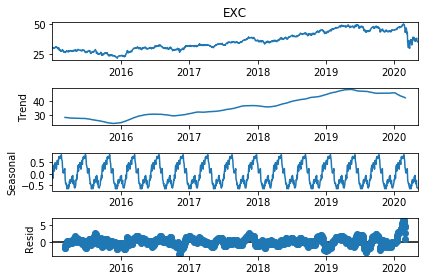

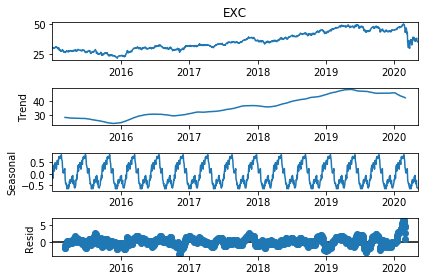

In [261]:
decomp=sm.tsa.seasonal_decompose(data['EXC'],model='additive',freq=90)
decomp.plot()

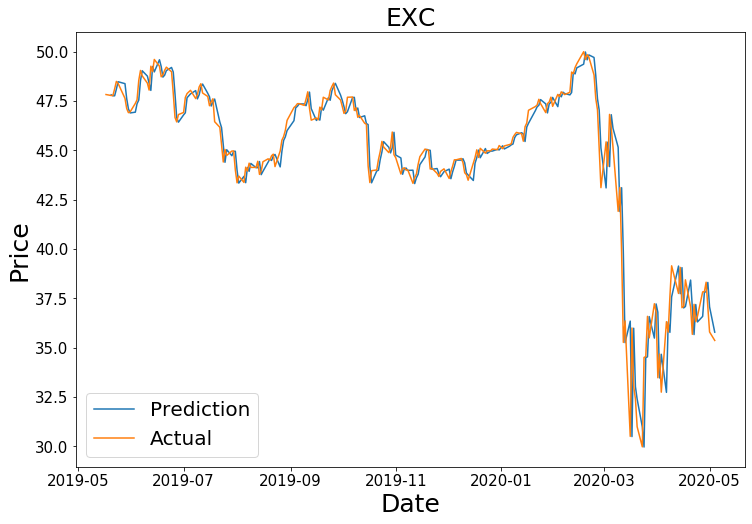

In [262]:
X=data['EXC']
train=X[:1100]
test=X[1100:]
predictions=sarimax(train,test)
graph(predictions,test,'EXC')

In [263]:
tune('EXC')

[30.91490936 30.03445244 29.80405045 ... 37.08000183 35.79999924
 35.36999893]
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 38.174
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 8.201
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 11.765
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'c']] 0.590
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'c']] 0.601
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'ct']] 0.601
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 4.273
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 0.594
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 0.595
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 0.595
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 0.602
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'ct']] 3.511
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'n']] 10.781
 > Model[[(1, 0, 1), (0, 0, 0, 0), 'n']] 0.595
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'ct']] 0.604
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 0.591
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 19.223
 > Model[[(0, 0, 1), (0, 0, 0, 0), 't']] 6.990
 > Model[[(1, 0, 1), (0, 0, 0, 0), 'c']] 0.595
 > Model[[(0, 0, 2), 

In [ ]:
models={}
for stock in extra:
    models[stock]=tune(stock)
    